1. DATA LOAD

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X = statlog_vehicle_silhouettes.data.features 
y = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
print(statlog_vehicle_silhouettes.variables) 


{'uci_id': 149, 'name': 'Statlog (Vehicle Silhouettes)', 'repository_url': 'https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes', 'data_url': 'https://archive.ics.uci.edu/static/public/149/data.csv', 'abstract': '3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 946, 'num_features': 18, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5HG6N', 'creators': ['Pete Mowforth', 'Barry Shepherd'], 'intro_paper': {'ID': 393, 'type': 'NATIVE', 'title': 'Vehicle Recognition Using Rule Based Methods', 'authors': 'J. Siebert', 'venue': 'Turing Institute', 'year': 1987, 'journal': None, 'DOI': None, 'URL': 'https:

In [4]:
y

,class
0,van
1,van
2,saab
3,van
4,bus
...,...
841,saab
842,van
843,saab
844,saab


In [5]:
X

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [6]:
y_series = y['class'].copy()
print(y_series.value_counts())  # 각 클래스 몇 개인지 보기

idx_204 = y_series[y_series == '204'].index
print(idx_204)

class
saab    217
bus     217
opel    212
van     199
204       1
Name: count, dtype: int64
Index([752], dtype='int64')


In [7]:
print(y_series)

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: class, Length: 846, dtype: object


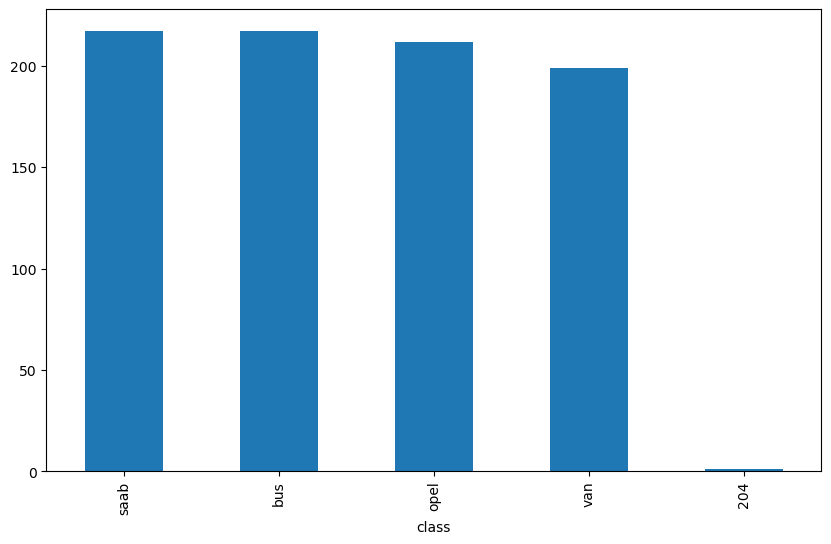

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
y_series.value_counts().plot(kind='bar')
plt.show()

In [9]:
X_cleaned, y_series_cleaned = X[y_series != '204'], y_series[y_series != '204']

In [10]:
print(y_series_cleaned.value_counts())

class
saab    217
bus     217
opel    212
van     199
Name: count, dtype: int64


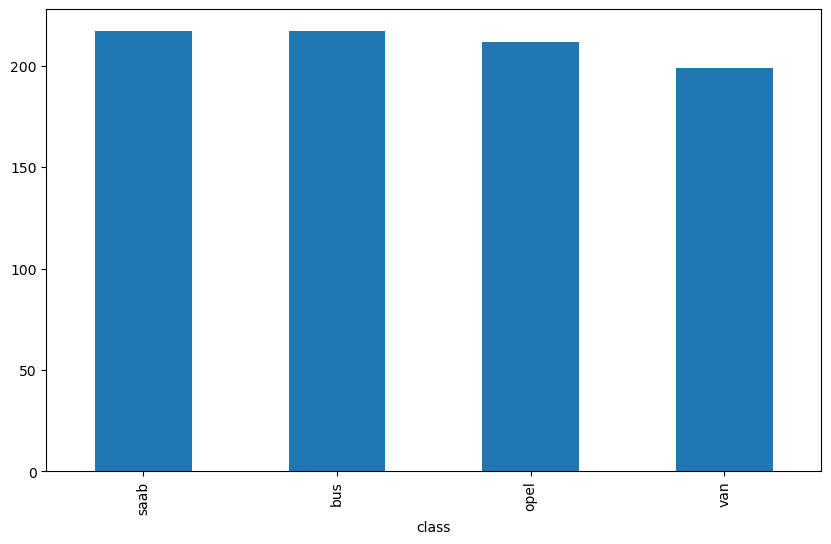

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
y_series_cleaned.value_counts().plot(kind='bar')
plt.show()

2. DATA Split

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y_series_cleaned.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_cleaned,y_series_cleaned,test_size=0.2,random_state=42)

3. DATA Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (676, 18)
X_test shape: (169, 18)
y_train shape: (676,)
y_test shape: (169,)


4. Training

In [14]:
# solver가 adam인 경우 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

results=[]
hidden_options = [(32,), (64,), (32, 16), (64, 32)]
alpha_options = [0.001, 0.01, 0.1]

for h in hidden_options:
    for a in alpha_options:
        clf = MLPClassifier(hidden_layer_sizes=h,alpha=a,max_iter=1500,solver='adam', random_state=42)
        clf.fit(X_train_scaled, y_train)
        y_train_hat = clf.predict(X_train_scaled)
        y_test_hat = clf.predict(X_test_scaled)
                
        train_acc = accuracy_score(y_train, y_train_hat)
        test_acc = accuracy_score(y_test, y_test_hat)
        
        results.append({
                    'hidden_layer_sizes': h,
                    'alpha': a,
                    'train_accuracy': train_acc,
                    'test_accuracy': test_acc
            })
            

results_df = pd.DataFrame(results)
print(results_df)



C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


   hidden_layer_sizes  alpha  train_accuracy  test_accuracy
0               (32,)  0.001        0.989645       0.863905
1               (32,)  0.010        0.989645       0.834320
2               (32,)  0.100        0.980769       0.863905
3               (64,)  0.001        1.000000       0.840237
4               (64,)  0.010        0.998521       0.834320
5               (64,)  0.100        0.989645       0.816568
6            (32, 16)  0.001        0.998521       0.804734
7            (32, 16)  0.010        1.000000       0.804734
8            (32, 16)  0.100        0.997041       0.804734
9            (64, 32)  0.001        1.000000       0.822485
10           (64, 32)  0.010        1.000000       0.810651
11           (64, 32)  0.100        1.000000       0.804734


In [18]:
### solver가 lbfgs 인 경우

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

results=[]
hidden_options = [(16,), (32,), (32, 16), (64, 32)]
alpha_options = [0.01, 0.1, 1.0]

for h in hidden_options:
    for a in alpha_options:
        clf = MLPClassifier(hidden_layer_sizes=h,alpha=a,max_iter=1500,solver='lbfgs', random_state=42)
        clf.fit(X_train_scaled, y_train)
        y_train_hat = clf.predict(X_train_scaled)
        y_test_hat = clf.predict(X_test_scaled)
                
        train_acc = accuracy_score(y_train, y_train_hat)
        test_acc = accuracy_score(y_test, y_test_hat)
        
        results.append({
                    'hidden_layer_sizes': h,
                    'alpha': a,
                    'train_accuracy': train_acc,
                    'test_accuracy': test_acc
            })
            
results_df = pd.DataFrame(results)
print(results_df)

C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

   hidden_layer_sizes  alpha  train_accuracy  test_accuracy
0               (16,)   0.01        1.000000       0.816568
1               (16,)   0.10        1.000000       0.834320
2               (16,)   1.00        0.983728       0.816568
3               (32,)   0.01        1.000000       0.804734
4               (32,)   0.10        1.000000       0.822485
5               (32,)   1.00        0.997041       0.804734
6            (32, 16)   0.01        1.000000       0.816568
7            (32, 16)   0.10        1.000000       0.822485
8            (32, 16)   1.00        1.000000       0.840237
9            (64, 32)   0.01        1.000000       0.828402
10           (64, 32)   0.10        1.000000       0.822485
11           (64, 32)   1.00        1.000000       0.857988


C:\anacon\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


5. Uncertainty quantification

In [19]:
from scipy.stats import entropy
import numpy as np
import pandas as pd

clf = MLPClassifier(hidden_layer_sizes=(32,),solver='adam', max_iter=1500, random_state=42, alpha=0.1)
clf.fit(X_train_scaled, y_train)

y_proba = clf.predict_proba(X_test_scaled) 

confidence = np.max(y_proba, axis=1)

sorted_probs = -np.sort(-y_proba, axis=1)  # 내림차순 정렬
margin = sorted_probs[:, 0] - sorted_probs[:, 1]

entropy_val = entropy(y_proba.T)  # 각 sample에 대해 엔트로피 계산

uq_df = pd.DataFrame({
    'confidence': confidence,
    'margin': margin,
    'entropy': entropy_val
})

print(uq_df.head())


   confidence    margin   entropy
0    0.958780  0.917712  0.172903
1    0.677793  0.358791  0.646979
2    0.983447  0.966898  0.084328
3    0.986852  0.973704  0.070011
4    0.997862  0.996662  0.017311


In [23]:
import pandas as pd

# Top 5 인덱스 및 값 추출
confidence_top5 = uq_df.sort_values(by='confidence', ascending=False).head(5)[['confidence']]
margin_top5 = uq_df.sort_values(by='margin', ascending=False).head(5)[['margin']]
entropy_top5 = uq_df.sort_values(by='entropy', ascending=True).head(5)[['entropy']]  # entropy는 낮을수록 확신 높음

# 인덱스와 값 정리
top5_df = pd.DataFrame({
    'confidence_idx': confidence_top5.index,
    'confidence_val': confidence_top5['confidence'].values,
    'margin_idx': margin_top5.index,
    'margin_val': margin_top5['margin'].values,
    'entropy_idx': entropy_top5.index,
    'entropy_val': entropy_top5['entropy'].values
})

# Bottom 5 인덱스 및 값 추출
confidence_bottom5 = uq_df.sort_values(by='confidence', ascending=True).head(5)[['confidence']]
margin_bottom5 = uq_df.sort_values(by='margin', ascending=True).head(5)[['margin']]
entropy_bottom5 = uq_df.sort_values(by='entropy', ascending=False).head(5)[['entropy']]  # entropy는 클수록 불확신 큼

# 인덱스와 값 정리
bottom5_df = pd.DataFrame({
    'confidence_idx': confidence_bottom5.index,
    'confidence_val': confidence_bottom5['confidence'].values,
    'margin_idx': margin_bottom5.index,
    'margin_val': margin_bottom5['margin'].values,
    'entropy_idx': entropy_bottom5.index,
    'entropy_val': entropy_bottom5['entropy'].values
})

# 출력
print("🔹 Top 5 UQ Samples")
display(top5_df)

print("\n🔻 Bottom 5 UQ Samples")
display(bottom5_df)


🔹 Top 5 UQ Samples


,confidence_idx,confidence_val,margin_idx,margin_val,entropy_idx,entropy_val
0,23,1.000000,23,1.000000,23,0.000002
1,73,1.000000,73,0.999999,73,0.000005
2,58,1.000000,58,0.999999,58,0.000006
3,36,1.000000,36,0.999999,36,0.000007
4,29,0.999999,29,0.999999,29,0.000008



🔻 Bottom 5 UQ Samples


,confidence_idx,confidence_val,margin_idx,margin_val,entropy_idx,entropy_val
0,162,0.375504,56,0.002228,162,1.186192
1,14,0.421686,14,0.014892,14,1.078986
2,56,0.500895,162,0.070127,76,0.892552
3,76,0.511600,135,0.080683,83,0.867202
4,135,0.525394,76,0.092605,92,0.827697


6. Evaluation (without reject option)

In [27]:
y_test_hat = clf.predict(X_test_scaled)
y_test = pd.Series(y_test).reset_index(drop=True)
y_test_hat = pd.Series(y_test_hat).reset_index(drop=True)
print(f"Accuracy (without reject option): {accuracy_score(y_test, y_test_hat):.5f}")

Accuracy (without reject option): 0.86391


7. Evaluation (with reject option)

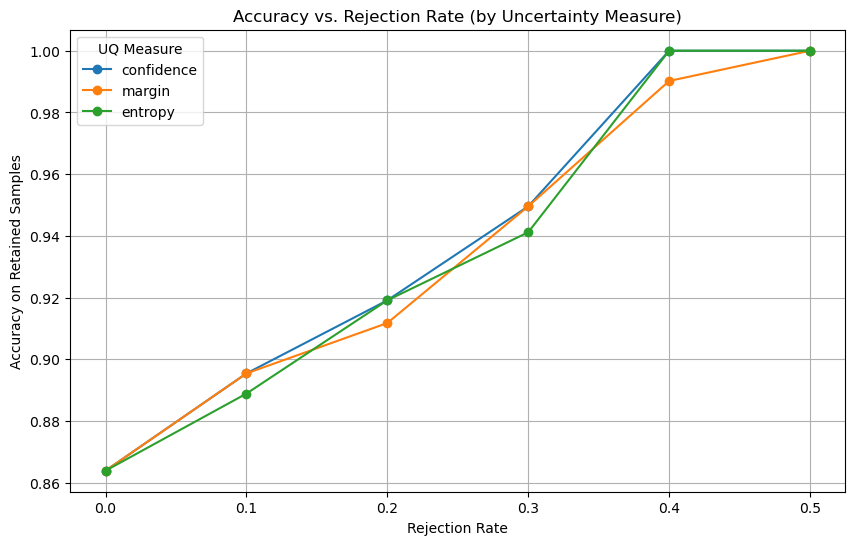

   Rejection Rate  Confidence    Margin   Entropy
0             0.0    0.863905  0.863905  0.863905
1             0.1    0.895425  0.895425  0.888889
2             0.2    0.919118  0.911765  0.919118
3             0.3    0.949580  0.949580  0.941176
4             0.4    1.000000  0.990196  1.000000
5             0.5    1.000000  1.000000  1.000000


In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 예측값
y_test_hat = clf.predict(X_test_scaled)
y_test = pd.Series(y_test).reset_index(drop=True)
y_test_hat = pd.Series(y_test_hat).reset_index(drop=True)

# Rejection rate 리스트
rejection_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
results = {'Rejection Rate': rejection_rates}

plt.figure(figsize=(10, 6))

# 정확도 계산 및 시각화
for measure in ['confidence', 'margin', 'entropy']:
    ascending = True if measure in ['confidence', 'margin'] else False
    sorted_idx = uq_df[measure].sort_values(ascending=ascending).index

    accuracies = []
    for r in rejection_rates:
        n_reject = int(len(y_test) * r)
        keep_idx = sorted_idx[n_reject:]

        acc = accuracy_score(y_test.iloc[keep_idx], y_test_hat.iloc[keep_idx])
        accuracies.append(acc)

    results[measure.capitalize()] = accuracies  # 대문자로 컬럼명 저장
    plt.plot(rejection_rates, accuracies, marker='o', label=measure)

# 그래프 시각화
plt.title("Accuracy vs. Rejection Rate (by Uncertainty Measure)")
plt.xlabel("Rejection Rate")
plt.ylabel("Accuracy on Retained Samples")
plt.grid(True)
plt.legend(title="UQ Measure")
plt.show()

# 정확도 결과를 표로 출력
result_df = pd.DataFrame(results)
print(result_df)
